In [ ]:
#!pip install braindecode mne numpy scipy torch moabb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.2/448.2 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.1/279.1 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.9/252.9 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.7/127.7 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 131.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not cu

In [ ]:
from braindecode.datasets import MOABBDataset

dataset = MOABBDataset(
    dataset_name="Schirrmeister2017",
    subject_ids=[1]
)

print(dataset)

Extracting EDF parameters from /root/mne_data/MNE-schirrmeister2017-data/train/1.edf...
Channel 'EEG Fp1' recognized as type EEG (renamed to 'Fp1').
Channel 'EEG Fp2' recognized as type EEG (renamed to 'Fp2').
Channel 'EEG Fpz' recognized as type EEG (renamed to 'Fpz').
Channel 'EEG F7' recognized as type EEG (renamed to 'F7').
Channel 'EEG F3' recognized as type EEG (renamed to 'F3').
Channel 'EEG Fz' recognized as type EEG (renamed to 'Fz').
Channel 'EEG F4' recognized as type EEG (renamed to 'F4').
Channel 'EEG F8' recognized as type EEG (renamed to 'F8').
Channel 'EEG FC5' recognized as type EEG (renamed to 'FC5').
Channel 'EEG FC1' recognized as type EEG (renamed to 'FC1').
Channel 'EEG FC2' recognized as type EEG (renamed to 'FC2').
Channel 'EEG FC6' recognized as type EEG (renamed to 'FC6').
Channel 'EEG M1' recognized as type EEG (renamed to 'M1').
Channel 'EEG T7' recognized as type EEG (renamed to 'T7').
Channel 'EEG C3' recognized as type EEG (renamed to 'C3').
Channel 'EEG 

In [ ]:
raw = dataset.datasets[0].raw

print(raw)
print("Sampling rate:", raw.info["sfreq"])
print("Channels:", len(raw.ch_names))


<RawEDF | 1.edf, 128 x 1226000 (2452.0 s), ~1.17 GiB, data loaded>
Sampling rate: 500.0
Channels: 128


In [ ]:
raw.annotations

<Annotations | 320 segments: feet (80), left_hand (80), rest (80), ...>

In [ ]:
import mne

events, event_id = mne.events_from_annotations(raw)

print(event_id)


Used Annotations descriptions: [np.str_('feet'), np.str_('left_hand'), np.str_('rest'), np.str_('right_hand')]
{np.str_('feet'): 1, np.str_('left_hand'): 2, np.str_('rest'): 3, np.str_('right_hand'): 4}


In [ ]:
epochs = mne.Epochs(
    raw,
    events=events,
    event_id=event_id,
    tmin=-0.5,
    tmax=4.0,
    baseline=None,
    preload=True
)


Not setting metadata
320 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 320 events and 2251 original time points ...
0 bad epochs dropped


In [ ]:
import numpy as np

X = epochs.get_data()

print("Max: ", np.max(X))
print("Min: ", np.min(X))


Max:  0.0007774585162511063
Min:  -0.0009150823433332316


In [ ]:
clean_trial_mask = np.max(np.abs(X), axis=(1, 2)) < 0.0008

print("Clean trials:", clean_trial_mask.sum(), "/", len(clean_trial_mask))

Clean trials: 319 / 320


In [ ]:
epochs_clean = epochs[clean_trial_mask]

In [ ]:
C_SENSORS = [
 'FC5','FC1','FC2','FC6','C3','C4','CP5','CP1','CP2','CP6',
 'FC3','FCz','FC4','C5','C1','C2','C6','CP3','CPz','CP4',
 'FFC5h','FFC3h','FFC4h','FFC6h','FCC5h','FCC3h','FCC4h','FCC6h',
 'CCP5h','CCP3h','CCP4h','CCP6h','CPP5h','CPP3h','CPP4h','CPP6h',
 'FFC1h','FFC2h','FCC1h','FCC2h','CCP1h','CCP2h','CPP1h','CPP2h'
]

In [ ]:
epochs_clean.pick_channels(C_SENSORS)
print(len(epochs_clean.ch_names))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
44


Using matplotlib as 2D backend.


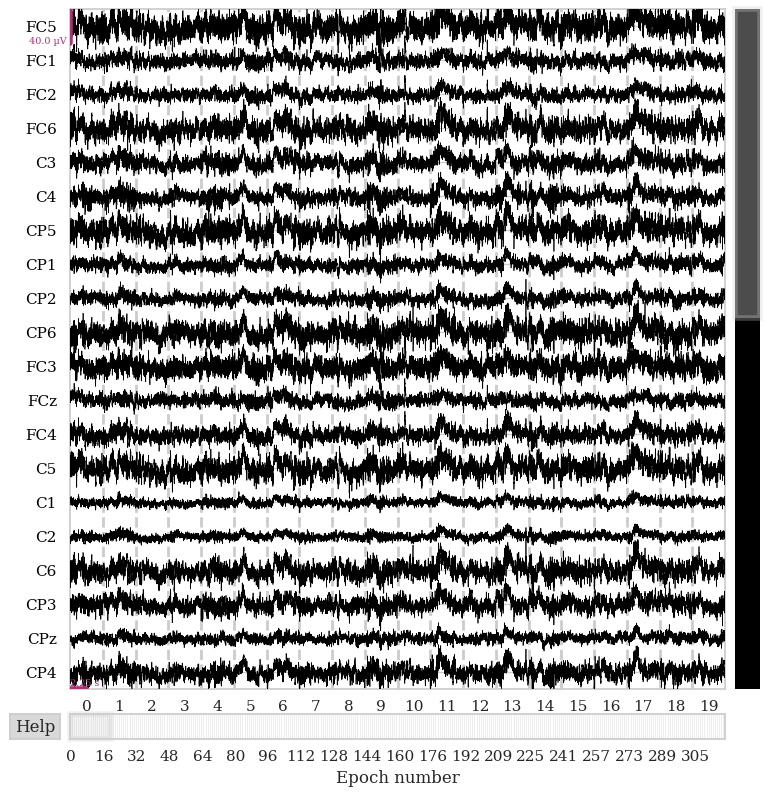

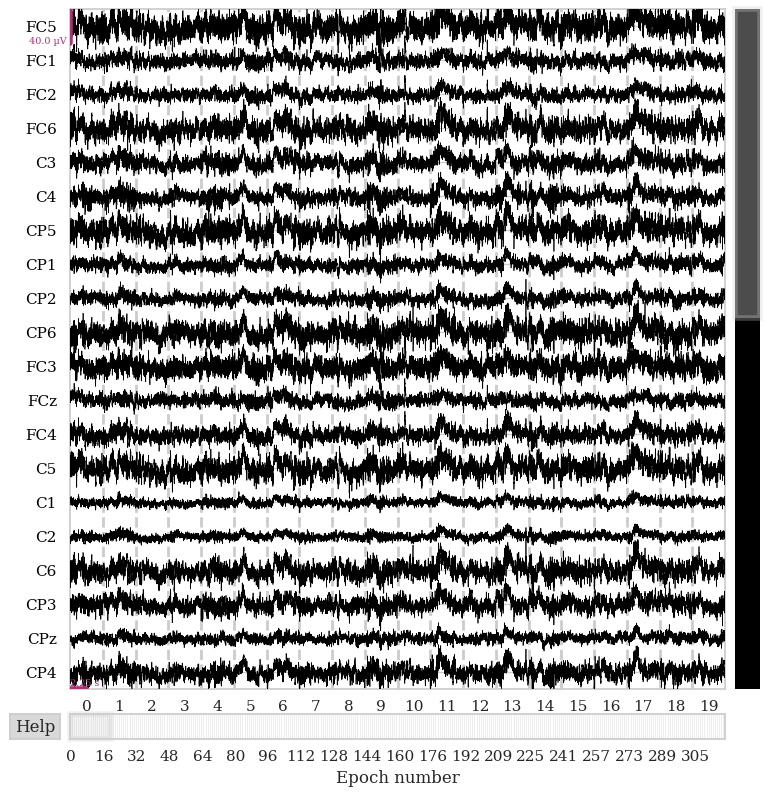

In [ ]:
epochs_clean.plot()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


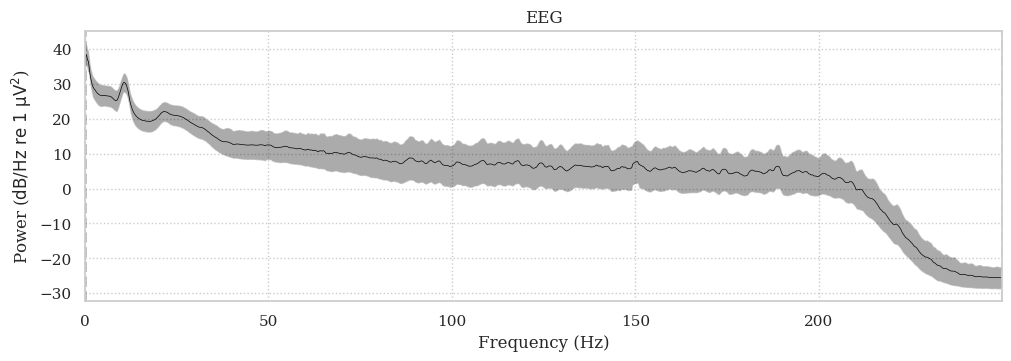

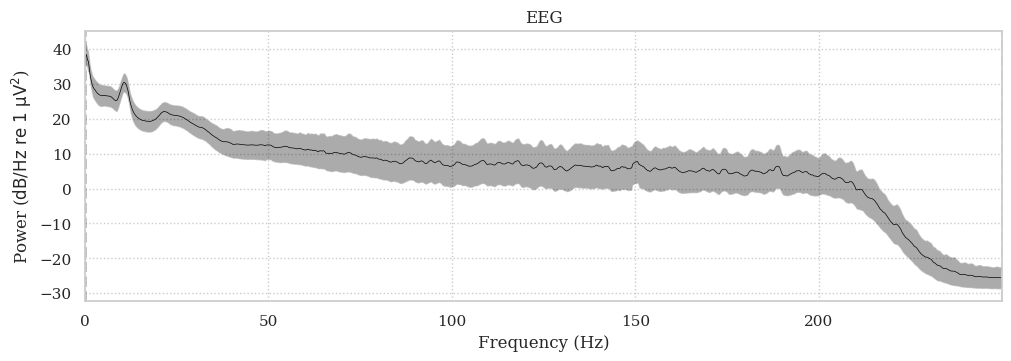

In [ ]:
epochs_clean.plot_psd(average=True)

In [ ]:
epochs_clean.ch_names

['FC5',
 'FC1',
 'FC2',
 'FC6',
 'C3',
 'C4',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'FC3',
 'FCz',
 'FC4',
 'C5',
 'C1',
 'C2',
 'C6',
 'CP3',
 'CPz',
 'CP4',
 'FFC5h',
 'FFC3h',
 'FFC4h',
 'FFC6h',
 'FCC5h',
 'FCC3h',
 'FCC4h',
 'FCC6h',
 'CCP5h',
 'CCP3h',
 'CCP4h',
 'CCP6h',
 'CPP5h',
 'CPP3h',
 'CPP4h',
 'CPP6h',
 'FFC1h',
 'FFC2h',
 'FCC1h',
 'FCC2h',
 'CCP1h',
 'CCP2h',
 'CPP1h',
 'CPP2h']

In [ ]:
epochs_clean.resample(250, npad="auto")

<Epochs | 319 events (all good), -0.5 – 4 s (baseline off), ~120.7 MiB, data loaded,
 np.str_('feet'): 80
 np.str_('left_hand'): 79
 np.str_('rest'): 80
 np.str_('right_hand'): 80>

In [ ]:
epochs_clean = epochs_clean.filter(
    l_freq=4.0,
    h_freq=None,
    method="iir",
    iir_params=dict(order=3, ftype="butter")
)


Setting up high-pass filter at 4 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 6 (effective, after forward-backward)
- Cutoff at 4.00 Hz: -6.02 dB



In [ ]:
from mne.decoding import Scaler

scaler = Scaler(scalings="mean")
X_std = scaler.fit_transform(epochs_clean.get_data())

In [ ]:
print("Mean:", np.mean(X_std))
print("Std:", np.std(X_std))

Mean: 2.899800820253531e-18
Std: 1.0000000000000027


In [ ]:
y = epochs_clean.events[:, -1]

In [ ]:
y

array([3, 1, 2, 4, 3, 4, 1, 2, 4, 3, 2, 1, 2, 1, 3, 4, 4, 1, 3, 2, 3, 1,
       2, 4, 3, 4, 2, 1, 1, 3, 4, 2, 1, 2, 4, 3, 4, 3, 1, 2, 1, 2, 4, 3,
       3, 2, 1, 4, 1, 3, 4, 2, 3, 4, 1, 2, 4, 1, 2, 3, 1, 3, 2, 4, 2, 1,
       4, 3, 4, 2, 1, 3, 2, 1, 4, 3, 4, 1, 3, 2, 2, 3, 4, 1, 1, 4, 3, 2,
       1, 3, 2, 4, 3, 2, 1, 4, 2, 1, 4, 3, 1, 4, 2, 3, 3, 2, 1, 4, 1, 3,
       2, 4, 1, 3, 4, 2, 3, 4, 1, 2, 3, 4, 1, 2, 2, 4, 1, 3, 2, 3, 4, 1,
       3, 1, 2, 4, 2, 3, 4, 1, 3, 4, 1, 2, 2, 4, 3, 1, 3, 1, 2, 4, 3, 1,
       4, 2, 2, 1, 4, 3, 4, 1, 2, 3, 4, 3, 1, 2, 4, 2, 3, 1, 4, 1, 2, 3,
       1, 4, 3, 2, 4, 3, 2, 1, 3, 1, 2, 4, 1, 2, 4, 3, 2, 3, 4, 1, 1, 3,
       4, 2, 3, 1, 4, 2, 4, 1, 3, 4, 3, 1, 2, 4, 1, 2, 3, 3, 1, 2, 4, 2,
       3, 4, 1, 4, 2, 3, 1, 4, 2, 1, 3, 4, 2, 1, 3, 3, 1, 2, 4, 3, 4, 2,
       1, 2, 1, 3, 4, 4, 3, 1, 2, 4, 2, 3, 1, 4, 3, 1, 2, 4, 1, 3, 2, 1,
       4, 2, 3, 3, 1, 4, 2, 4, 3, 2, 1, 3, 2, 4, 1, 1, 2, 3, 4, 4, 2, 1,
       3, 4, 2, 1, 3, 4, 2, 3, 1, 2, 1, 3, 4, 1, 3,

In [ ]:
print("Labels shape:", y.shape)
print("Unique labels:", np.unique(y))


Labels shape: (319,)
Unique labels: [1 2 3 4]


In [ ]:
print("FINAL DATASET")
print("Trials:", X_std.shape[0])
print("Channels:", X_std.shape[1])
print("Time samples:", X_std.shape[2])
print("Sampling rate:", epochs_clean.info["sfreq"])


FINAL DATASET
Trials: 319
Channels: 44
Time samples: 1126
Sampling rate: 250.0


In [ ]:
print("Min:", X_std.min())
print("Max:", X_std.max())

Min: -42.008188069821294
Max: 57.430317746627495


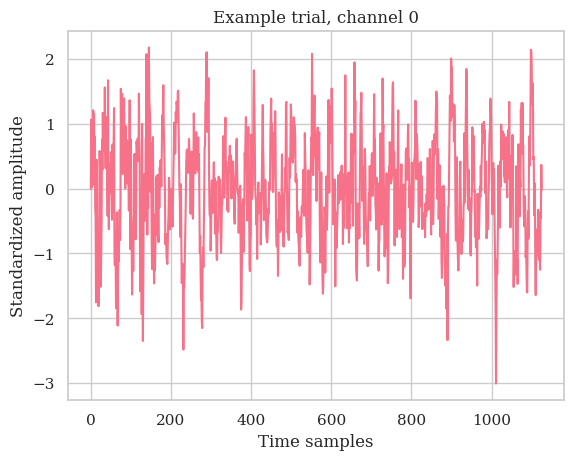

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_std[0, 0])
plt.title("Example trial, channel 0")
plt.xlabel("Time samples")
plt.ylabel("Standardized amplitude")
plt.show()

In [ ]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(1): np.int64(80), np.int64(2): np.int64(79), np.int64(3): np.int64(80), np.int64(4): np.int64(80)}


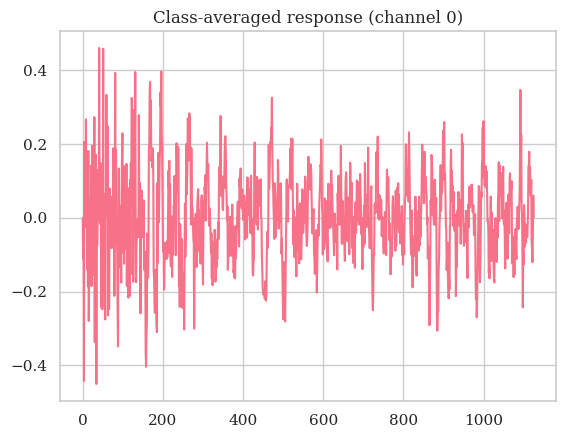

In [ ]:
class_0_trials = X_std[y == unique[0]]
mean_response = class_0_trials.mean(axis=0)

plt.plot(mean_response[0])
plt.title("Class-averaged response (channel 0)")
plt.show()

In [ ]:
rejection_rate = 1 - (X_std.shape[0] / 320)
print("Rejection rate:", rejection_rate)

Rejection rate: 0.0031250000000000444


# **Pipeline**

---



In [ ]:
import numpy as np
import mne
from braindecode.datasets import MOABBDataset
from mne.decoding import Scaler

In [ ]:
C_SENSORS = [
 'FC5','FC1','FC2','FC6','C3','C4','CP5','CP1','CP2','CP6',
 'FC3','FCz','FC4','C5','C1','C2','C6','CP3','CPz','CP4',
 'FFC5h','FFC3h','FFC4h','FFC6h','FCC5h','FCC3h','FCC4h','FCC6h',
 'CCP5h','CCP3h','CCP4h','CCP6h','CPP5h','CPP3h','CPP4h','CPP6h',
 'FFC1h','FFC2h','FCC1h','FCC2h','CCP1h','CCP2h','CPP1h','CPP2h'
]

In [ ]:
def preprocess_subject(subject_id):
    dataset = MOABBDataset(
        dataset_name="Schirrmeister2017",
        subject_ids=[subject_id]
    )

    raw_train = dataset.datasets[0].raw
    raw_test  = dataset.datasets[1].raw

    def process_raw(raw):
        events, event_id = mne.events_from_annotations(raw)

        epochs = mne.Epochs(
            raw,
            events=events,
            event_id=event_id,
            tmin=-0.5,
            tmax=4.0,
            baseline=None,
            preload=True
        )

        X = epochs.get_data() * 1e6
        clean_mask = np.max(np.abs(X), axis=(1,2)) < 800
        epochs = epochs[clean_mask]


        epochs.pick(C_SENSORS)

        epochs.resample(250)

        epochs.filter(
            l_freq=4.0,
            h_freq=None,
            method="iir",
            iir_params=dict(order=3, ftype="butter")
        )

        return epochs

    epochs_train = process_raw(raw_train)
    epochs_test  = process_raw(raw_test)

    return epochs_train, epochs_test


In [ ]:
import os
import json

BASE_DIR = "/content/high_gamma_preprocessed"
os.makedirs(BASE_DIR, exist_ok=True)


In [ ]:
for subj in range(1, 15):
    print(f"Saving subject {subj:02d}")

    ep_train, ep_test = preprocess_subject(subj)

    scaler = Scaler(scalings="mean")

    Xtr = scaler.fit_transform(ep_train.get_data())
    Xte = scaler.transform(ep_test.get_data())

    ytr = ep_train.events[:, -1] - 1
    yte = ep_test.events[:, -1] - 1

    subj_dir = os.path.join(BASE_DIR, f"subject_{subj:02d}")
    os.makedirs(subj_dir, exist_ok=True)

    np.savez_compressed(
        os.path.join(subj_dir, "train.npz"),
        X=Xtr.astype(np.float32),
        y=ytr.astype(np.int64)
    )

    np.savez_compressed(
        os.path.join(subj_dir, "test.npz"),
        X=Xte.astype(np.float32),
        y=yte.astype(np.int64)
    )

    meta = {
        "subject": subj,
        "sfreq": ep_train.info["sfreq"],
        "n_channels": len(ep_train.ch_names),
        "channels": ep_train.ch_names,
        "class_mapping": {
            "0": "Right Hand",
            "1": "Left Hand",
            "2": "Rest",
            "3": "Feet"
        }
    }

    with open(os.path.join(subj_dir, "meta.json"), "w") as f:
        json.dump(meta, f, indent=2)


Saving subject 01


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'web.gin.g-node.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gin.g-node.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


HTTPError: 503 Server Error: Service Unavailable for url: https://gin.g-node.org/robintibor/high-gamma-dataset/raw/master/data/train/1.edf